# collatz conjecture by sean

### so to start
### Given: $ n \in \mathbb{N} $
$$
if\, n \, mod(2) = 0:\, n = 3\,n + 1 \\ 
else:\, n = n / 2 \\
$$

### now, if N ever repeats, we say that N terminates   
#### ex)  
$$
5\rightarrow 16 \rightarrow 8 \rightarrow 4 \rightarrow 2 \rightarrow 1 \rightarrow 4 \\
$$
#### since 4 has now come up twice, and so we say 5 terminates at 1, in 5 moves. because we want to stop BEFORE we repeat

### so, let $ x \in \mathbb{N} $, if $ n\,=\,2^{x} $, then n will terminate in $ \log_{2}(n) = x$, moves   
### this brings up another important question that i will choose not to worry about until later
## is there any N that terminates but doesnt terminate at 1?
#### ex)  
    lets just say that some number N went up and dropped back down to itself, never going under itself along the way. 1 is a perfect example since 1 -> 4 ->2 and then terminates because its next value has already appeared.  its unlikely to occur elsewhere, but CAN happen until i prove it cant  
    likewise, there are other types of constrained examples like this that i will have to prove can't happen, or are inclusive to the logic i will show.

### so, if $ n = 2^{x}\,\, and \, x\in\mathbb{N} $, then we know that n will terminate  
### but what about every n that isnt 2 to some power?  
### well, let $ m\in\mathbb{N} $ and let $ x \in\mathbb{N} $, and let $n=m*2^{x}$  
### the following constraints essentialy say, let N be some multiple of 2  
### in order to tell if N terminates, we need to know if $\frac{n}{2^{x}}$ terminates  

### since any even defaults to half, if every odd terminates, then every number will terminate

#### lets make a test() method thatll go through and test numbers while keeping track of steps
note: we're really only checking if a number gets to 1, we arent accounting for circular terminating numbers right now. if we run into one, there will be a runtime error and we can further investigate

In [1]:
import math
import pandas as pd
import matplotlib.pyplot as plt

DF=pd.DataFrame({"n":[], "steps":[]}) #might want to add a column for "maxReached"
#didnt make it work yet
def test(n, steps):
    global DF
    #add in a checker that checks DF
    if n in DF["n"]:
        return DF["steps"][DF["n"].index(n)] + steps 
    else:
        d={"n":[], "steps":[]} #for adding to global DF
        #test if power of 2, return steps plus log base 2
        tmp = math.modf(math.log(n, 2))
        if tmp[0]==0.0:
            totalSteps = steps+int(tmp[1])
            return totalSteps
        #above should work as base case
        #next we recursively call
        if n%2==0:
            totalSteps = test(int(n/2), steps+1)
            return totalSteps
        else:
            totalSteps = test(3*n+1, steps+1)
            return totalSteps

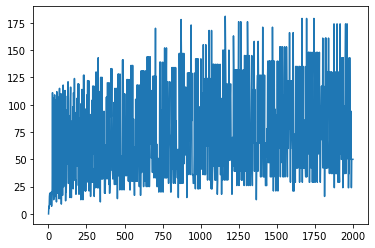

In [3]:
#now we want to check all odds
odds=[2*x+1 for x in range(1000)]
tests=[test(odd, 0) for odd in odds]
plt.plot(odds, tests)

### the first 1000 odds are valid and terminate. surprisingly all in under 200 total moves (with slight postivie correlation in moves?)
### can i prove ALL odds terminate? prob not but lets try

### test primes for termination

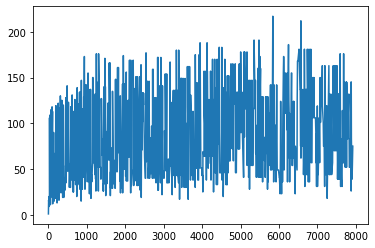

In [4]:
#do primes?
first1000primes=[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563, 569, 571, 577, 587, 593, 599, 601, 607, 613, 617, 619, 631, 641, 643, 647, 653, 659, 661, 673, 677, 683, 691, 701, 709, 719, 727, 733, 739, 743, 751, 757, 761, 769, 773, 787, 797, 809, 811, 821, 823, 827, 829, 839, 853, 857, 859, 863, 877, 881, 883, 887, 907, 911, 919, 929, 937, 941, 947, 953, 967, 971, 977, 983, 991, 997, 1009, 1013, 1019, 1021, 1031, 1033, 1039, 1049, 1051, 1061, 1063, 1069, 1087, 1091, 1093, 1097, 1103, 1109, 1117, 1123, 1129, 1151, 1153, 1163, 1171, 1181, 1187, 1193, 1201, 1213, 1217, 1223, 1229, 1231, 1237, 1249, 1259, 1277, 1279, 1283, 1289, 1291, 1297, 1301, 1303, 1307, 1319, 1321, 1327, 1361, 1367, 1373, 1381, 1399, 1409, 1423, 1427, 1429, 1433, 1439, 1447, 1451, 1453, 1459, 1471, 1481, 1483, 1487, 1489, 1493, 1499, 1511, 1523, 1531, 1543, 1549, 1553, 1559, 1567, 1571, 1579, 1583, 1597, 1601, 1607, 1609, 1613, 1619, 1621, 1627, 1637, 1657, 1663, 1667, 1669, 1693, 1697, 1699, 1709, 1721, 1723, 1733, 1741, 1747, 1753, 1759, 1777, 1783, 1787, 1789, 1801, 1811, 1823, 1831, 1847, 1861, 1867, 1871, 1873, 1877, 1879, 1889, 1901, 1907, 1913, 1931, 1933, 1949, 1951, 1973, 1979, 1987, 1993, 1997, 1999, 2003, 2011, 2017, 2027, 2029, 2039, 2053, 2063, 2069, 2081, 2083, 2087, 2089, 2099, 2111, 2113, 2129, 2131, 2137, 2141, 2143, 2153, 2161, 2179, 2203, 2207, 2213, 2221, 2237, 2239, 2243, 2251, 2267, 2269, 2273, 2281, 2287, 2293, 2297, 2309, 2311, 2333, 2339, 2341, 2347, 2351, 2357, 2371, 2377, 2381, 2383, 2389, 2393, 2399, 2411, 2417, 2423, 2437, 2441, 2447, 2459, 2467, 2473, 2477, 2503, 2521, 2531, 2539, 2543, 2549, 2551, 2557, 2579, 2591, 2593, 2609, 2617, 2621, 2633, 2647, 2657, 2659, 2663, 2671, 2677, 2683, 2687, 2689, 2693, 2699, 2707, 2711, 2713, 2719, 2729, 2731, 2741, 2749, 2753, 2767, 2777, 2789, 2791, 2797, 2801, 2803, 2819, 2833, 2837, 2843, 2851, 2857, 2861, 2879, 2887, 2897, 2903, 2909, 2917, 2927, 2939, 2953, 2957, 2963, 2969, 2971, 2999, 3001, 3011, 3019, 3023, 3037, 3041, 3049, 3061, 3067, 3079, 3083, 3089, 3109, 3119, 3121, 3137, 3163, 3167, 3169, 3181, 3187, 3191, 3203, 3209, 3217, 3221, 3229, 3251, 3253, 3257, 3259, 3271, 3299, 3301, 3307, 3313, 3319, 3323, 3329, 3331, 3343, 3347, 3359, 3361, 3371, 3373, 3389, 3391, 3407, 3413, 3433, 3449, 3457, 3461, 3463, 3467, 3469, 3491, 3499, 3511, 3517, 3527, 3529, 3533, 3539, 3541, 3547, 3557, 3559, 3571, 3581, 3583, 3593, 3607, 3613, 3617, 3623, 3631, 3637, 3643, 3659, 3671, 3673, 3677, 3691, 3697, 3701, 3709, 3719, 3727, 3733, 3739, 3761, 3767, 3769, 3779, 3793, 3797, 3803, 3821, 3823, 3833, 3847, 3851, 3853, 3863, 3877, 3881, 3889, 3907, 3911, 3917, 3919, 3923, 3929, 3931, 3943, 3947, 3967, 3989, 4001, 4003, 4007, 4013, 4019, 4021, 4027, 4049, 4051, 4057, 4073, 4079, 4091, 4093, 4099, 4111, 4127, 4129, 4133, 4139, 4153, 4157, 4159, 4177, 4201, 4211, 4217, 4219, 4229, 4231, 4241, 4243, 4253, 4259, 4261, 4271, 4273, 4283, 4289, 4297, 4327, 4337, 4339, 4349, 4357, 4363, 4373, 4391, 4397, 4409, 4421, 4423, 4441, 4447, 4451, 4457, 4463, 4481, 4483, 4493, 4507, 4513, 4517, 4519, 4523, 4547, 4549, 4561, 4567, 4583, 4591, 4597, 4603, 4621, 4637, 4639, 4643, 4649, 4651, 4657, 4663, 4673, 4679, 4691, 4703, 4721, 4723, 4729, 4733, 4751, 4759, 4783, 4787, 4789, 4793, 4799, 4801, 4813, 4817, 4831, 4861, 4871, 4877, 4889, 4903, 4909, 4919, 4931, 4933, 4937, 4943, 4951, 4957, 4967, 4969, 4973, 4987, 4993, 4999, 5003, 5009, 5011, 5021, 5023, 5039, 5051, 5059, 5077, 5081, 5087, 5099, 5101, 5107, 5113, 5119, 5147, 5153, 5167, 5171, 5179, 5189, 5197, 5209, 5227, 5231, 5233, 5237, 5261, 5273, 5279, 5281, 5297, 5303, 5309, 5323, 5333, 5347, 5351, 5381, 5387, 5393, 5399, 5407, 5413, 5417, 5419, 5431, 5437, 5441, 5443, 5449, 5471, 5477, 5479, 5483, 5501, 5503, 5507, 5519, 5521, 5527, 5531, 5557, 5563, 5569, 5573, 5581, 5591, 5623, 5639, 5641, 5647, 5651, 5653, 5657, 5659, 5669, 5683, 5689, 5693, 5701, 5711, 5717, 5737, 5741, 5743, 5749, 5779, 5783, 5791, 5801, 5807, 5813, 5821, 5827, 5839, 5843, 5849, 5851, 5857, 5861, 5867, 5869, 5879, 5881, 5897, 5903, 5923, 5927, 5939, 5953, 5981, 5987, 6007, 6011, 6029, 6037, 6043, 6047, 6053, 6067, 6073, 6079, 6089, 6091, 6101, 6113, 6121, 6131, 6133, 6143, 6151, 6163, 6173, 6197, 6199, 6203, 6211, 6217, 6221, 6229, 6247, 6257, 6263, 6269, 6271, 6277, 6287, 6299, 6301, 6311, 6317, 6323, 6329, 6337, 6343, 6353, 6359, 6361, 6367, 6373, 6379, 6389, 6397, 6421, 6427, 6449, 6451, 6469, 6473, 6481, 6491, 6521, 6529, 6547, 6551, 6553, 6563, 6569, 6571, 6577, 6581, 6599, 6607, 6619, 6637, 6653, 6659, 6661, 6673, 6679, 6689, 6691, 6701, 6703, 6709, 6719, 6733, 6737, 6761, 6763, 6779, 6781, 6791, 6793, 6803, 6823, 6827, 6829, 6833, 6841, 6857, 6863, 6869, 6871, 6883, 6899, 6907, 6911, 6917, 6947, 6949, 6959, 6961, 6967, 6971, 6977, 6983, 6991, 6997, 7001, 7013, 7019, 7027, 7039, 7043, 7057, 7069, 7079, 7103, 7109, 7121, 7127, 7129, 7151, 7159, 7177, 7187, 7193, 7207, 7211, 7213, 7219, 7229, 7237, 7243, 7247, 7253, 7283, 7297, 7307, 7309, 7321, 7331, 7333, 7349, 7351, 7369, 7393, 7411, 7417, 7433, 7451, 7457, 7459, 7477, 7481, 7487, 7489, 7499, 7507, 7517, 7523, 7529, 7537, 7541, 7547, 7549, 7559, 7561, 7573, 7577, 7583, 7589, 7591, 7603, 7607, 7621, 7639, 7643, 7649, 7669, 7673, 7681, 7687, 7691, 7699, 7703, 7717, 7723, 7727, 7741, 7753, 7757, 7759, 7789, 7793, 7817, 7823, 7829, 7841, 7853, 7867, 7873, 7877, 7879, 7883, 7901, 7907, 7919]
primeTest= [test(p, 0) for p in first1000primes]
plt.plot(first1000primes, primeTest)

### the first 1000 primes terminate. Im not gonna call it bc that doesnt actually mean anything but it really do be feeling all inclusive